## EM algorithm
***

In [109]:
from typing import Tuple

import matplotlib.pyplot as plt
import numpy as np
from numpy.typing import ArrayLike
from scipy.stats import norm

In [110]:
def e_step(mu, sig, weight, x) -> ArrayLike:
    likeli_1 = norm(mu[0], sig[0]).pdf(x)
    likeli_2 = norm(mu[1], sig[1]).pdf(x)

    evidence = weight[0]*likeli_1 + weight[1]*likeli_2

    posterior = np.array([
        (weight[0]*likeli_1) / evidence,
        (weight[1]*likeli_2) / evidence
    ])
    return posterior

In [111]:
def m_step(posterior, x) -> Tuple[ArrayLike, ArrayLike]:
    size = [
        np.sum(posterior[0]),
        np.sum(posterior[1])
    ]
    mu = np.array([
        np.sum(x*posterior_1)/size[0],
        np.sum(x*posterior_2)/size[1]
    ])
    var = np.array([
        np.sum(posterior_1*np.power(x-mu[0], 2))/size[0],
        np.sum(posterior_2*np.power(x-mu[1], 2))/size[1]
    ])

    return mu, np.sqrt(var)


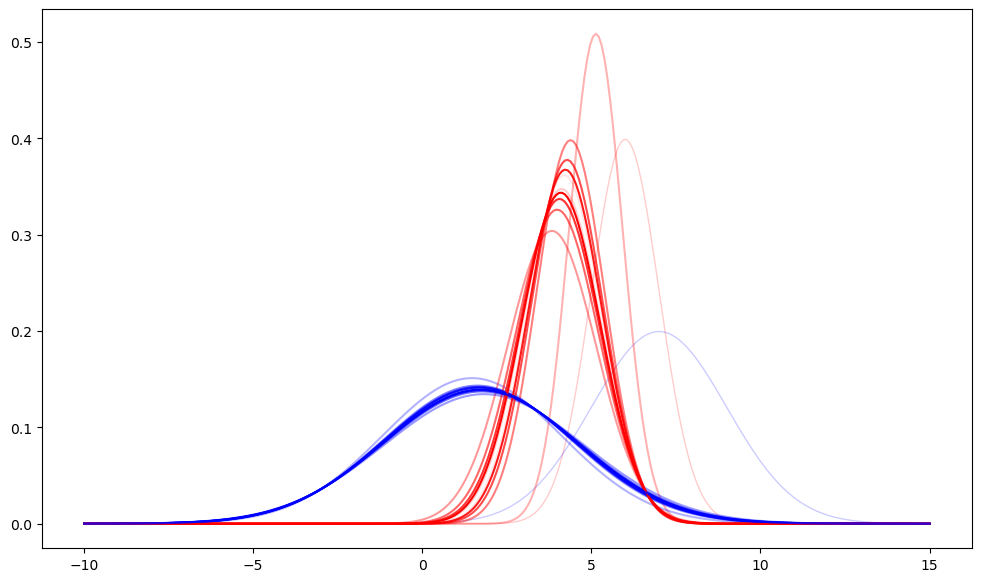

In [130]:
# Parameters
x      = np.array([-1, 0, 4, 5, 6])
mu     = np.array([6,7])
sig    = np.array([1,2])
weight = np.array([0.5, 0.5])
xaxis  = np.linspace(-10, 15, 300)


# Initialization
norm_1 = norm(mu[0], sig[0]).pdf(xaxis)
norm_2 = norm(mu[1], sig[1]).pdf(xaxis)
alpha = 0.2
plt.figure(figsize=(12,7))
plt.plot(xaxis, norm_1, color="red", label="N_1", lw=1, alpha=alpha)
plt.plot(xaxis, norm_2, color="blue", label="N_2", lw=1, alpha=alpha)


# EM Algorithm
for i in range(10):
    posterior = e_step(mu, sig, weight, x)
    mu, sig = m_step(posterior, x)

    norm_1 = norm(mu[0], sig[0]).pdf(xaxis)
    norm_2 = norm(mu[1], sig[1]).pdf(xaxis)

    alpha += 0.1
    plt.plot(xaxis, norm_1, color="red", alpha=alpha)
    plt.plot(xaxis, norm_2, color="blue", alpha=alpha)
